# Calculus in Python:


In this series of notebooks I will outline basic calculus in Python. This will include analytic and numeric methods using pure Python and functions from SciPy, Numy and SymPy. This is the first notebook, concerned with differential calculus including analytic differentiation, numeric differentiation, truncation and roundign errors.


## 1. Differential Calculus

Differential calculus is concerned with finding derivatives of functions. The derivative is the slope of a tangent to a function $f(x)$. To differentiate is to find the derivative $f'(x)$ of a function $f(x)$.

<img src="./Assets/tangent_curve.png" width=200 height=200 />

There are two possible approaches - the analytical and the numeric. The analytic approach applies uses a set of rules to differentiate a function precisely, giving an exact equation for the derivative that is easy to solve. It could be described as the "symbolic" approach as it does not use actual values to compute the slope of the function, instead it uses a series of rules for rearranging symbols representing a function to give a precise symbolic representation of the derivative, which can then be evaluated by plugging in numeric values. Analytic differentiation returns an equation, not a number. That equation can be used to calculate the derivative anywhere in the entire domain of a function, rather than determining the slope of a tangent to $f(x)$ at a given value $x$.

However, in many cases the analytic solution might be very difficult or impossible to evaluate. In these cases, the numeric approach is used to *estimate* the true derivative by plugging values into the function and measuring the slope between them. The behaviour of the function between two values of a function is assumed to comply with some known model such that the approximation improves as the gap between values shrinks.

Python offers methods for both analytic and numeric techniques for differentiation.


### 1.1 Analytic differentiation

### 1.1.0 Introduction

Analytic techniques in Python are achieved using SymPy (Symbolic Python). SymPy allows a user to define symbolic variables and offers built-in functions for precisely differentiating, integrating and solving equations, as well as offering convenient syntax for aesthetic presentation of equations. The power of SymPy is that is does not always return a numeric result for an operation - it returns symbolic answers, for example expanded or rearranged equations. Here, we will begin by importing the package and defining some symbolic variables and toggling "pretty print".


In [1]:
import sympy as sym

# this command toggles printing mathematical objects in 
# aesthetic typeface 

sym.init_printing(pretty_print=True)


Now, just to clarify why SymPy is so useful, we'll use an example from the SymPy documentation. With regular Python we can take square roots using math.sqrt(). For a perfect square this returns an integer:

In [5]:
import math
math.sqrt(9)

However, if we take the square root of a non-perfect square that returns an irrational number, e.g. $\sqrt8$, Python will return a numeric approximation, with the precision defined by the data type used. For example, an 32 bit float will store a greater precision than an 8bit integer. However, the true answer is irrational and can only be precisely represented symbolically. This can be achieved using SymPy:

In [20]:
import numpy as np
print("\nPython approximation of sqrt(8):\n")
print("8 bit integer: ", np.int8(math.sqrt(8)))
print("16 bit floating point number", np.float16(math.sqrt(8)))
print("32 bit floating point number", np.float32(math.sqrt(8)))
print("64 bit floating point number", np.float64(math.sqrt(8)))
print("128 bit floating point number", np.float128(math.sqrt(8)))


print("\n\nSymbolic solution to sqrt(8):")
sym.sqrt(8)




Python approximation of sqrt(8):

8 bit integer:  2
16 bit floating point number 2.828
32 bit floating point number 2.828427
64 bit floating point number 2.8284271247461903
128 bit floating point number 2.828427124746190291


Symbolic solution to sqrt(8):


### 1.1.1 Differentiation

Moving on to differentiation, we first need to define variables and a simple function. We will use a function that is easy to differentiate manually so it is straighforward to sanity-check the answer provided by SymPy. Our function will just have one variable (x).

In [21]:
x = sym.symbols('x')
func = sym.cos(x)*5

So SymPy now holds the symbolic variable $x$ and the function $f(x) = cos(x) * 5$. To differentiate this function, we can simply use the diff function, which will provide the analytic derivative of $cos(x) * 5$.

In [22]:
print("The derivative of func f(x) = cos(x) * 5 = ")
sym.diff(func)


The derivative of func f(x) = cos(x) * 5 = 


Now we have seen how to define symbolic variables and functions, we can start using SymPy to revise the basic rules of differentiation, starting with some fundamental rules, then moving on t the product, power, chain and quotient rules.

### 1.1.2 Derivatives of coefficients, constants, cos, sin, log and exp

We're starting by differentiating these types of functions because there are fundamental rules for them that will also be important when we look at some more complex derivatives.
\
\
*Coefficients*

When a coefficient is multiplied by a constant, the derivative is equal to the product of the derivate of the coefficient and the constant, such that:

$d/dx(A* f(x)) = A* f'(x)$

e.g. differentiate the function $5x^3$:

$f'(x) = 5 * 3x^2 = 15x^2$

\
\
*Constants*

The derivative of any constant is equal to 0. This is because a constant is a straight, flat line when plotted, with a slope of 0. 

i.e. differentiate the function $f(x) = x + 3$

the constant disappears and $x$ can be rewritten as $x^1 = 1 * x^{1-1} = 1 * x^0 = 1*1 = 1$

$f'(x) = 1$

\
\
*cos and sin*

There is an interesting relationship between sin and cos where:

$d/dx (sin(x) = cos(x)$

$d/dx (cos(x) = -sin(x)$
\
\
\
*Exponentials*
\
\
Exponential functions have the surprising property that the function and the derivate are the same, i.e. the slope of the function at a given point is equal to the value of the function at that same point:
\
\
$f(x) =  e^x $

$f'(x) = e^x $
\
\
\
*Logarithms*
\
\
For logarithms, the derivative of 𝑓(𝑥)=𝑙𝑜𝑔(𝑥) is equal to 1/𝑥
\
\
\
Let's just verify these derivatives using symPy:

In [29]:
# DIFFERENTIATE CONSTANTS

x = sym.symbols('x')
func= x+3
fprime = sym.diff(func)


fprime

In [30]:
# DIFFERENTIATE SIN

x = sym.symbols('x')
func= sym.sin(x)
fprime = sym.diff(func)


fprime

In [31]:
# DIFFERENTIATE COS

x = sym.symbols('x')
func= sym.cos(x)
fprime = sym.diff(func)

fprime

In [90]:
# DIFFERENTIATE EXPONENTIAL

x = sym.symbols('x')
func= sym.exp(x)
fprime = sym.diff(func)

fprime

In [32]:
# DIFFERENTIATE LOGARITHM

x = sym.symbols('x')
func= sym.log(x)
fprime = sym.diff(func)

fprime

### 1.1.3 The Product Rule

The product rule allows us to take the derivate of several functions multiplied together, such that a function

$h(x) = (f(x) * g(x))$


can be differentiated as


$h'(x) = f'(x) * g(x) + f(x) * g'(x)$.

For example, we can differentiate the function $h(x)$:

$h(x) = sin(x) * cos(x)$

$h'(x) = cos(x)* cos(x) + sin(x) * -sin(x)$

which simplifies to 

$h'(x) = -sin^2(x)+cos^2(x)$

Verify with SymPy:

In [33]:
x = sym.symbols('x')
func= sym.sin(x)*sym.cos(x)
fprime = sym.diff(func)

fprime

### 1.1.4 The Power Rule

The power rule states that for a function with an exponent, $f(x) = x^y$, the derivative $f'(x) = yx^{y-1}$. A simple example is for the function $f(x) = x^3$ the derivative $f'(x)$ is equal to $3x^{3-1} = 3x^2$.

Let's do some examples with SymPy:

1) Differentiate the function $f(x) = 5x^4 $

We can differentiate this manually as $(5 * 4)x ^ {4-1} = 20x^3$. Check our answer using SymPy:

In [34]:
x = sym.symbols('x')
func= 5*x**4
fprime = sym.diff(func)

fprime

2) Differentiate the function $6x^5$:

Manually, this is $(6*5)x^{5-1} = 30x^4$. Let's check using SymPy:

In [35]:
x = sym.symbols('x')
func= 6*x**5
fprime = sym.diff(func)

fprime

The power rule is slightly more nuanced when we incorporate negative exponents, such as $x^{-1}$. In these situations we follow precisely the same process so that the derivative $f'$ is equal to $-1x^{-1-1} = -1x^{-2}$. Remember that raising $x$ to a negative power is the same as the reiprocal of $x$ raised to the positive power, so the derivative can also be written as $-{1/{x^2}}$. Lets check using SymPy:

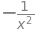

In [36]:
x = sym.symbols('x')
func= x**-1
fprime = sym.diff(func)

fprime

### 1.1.4 The Chain Rule

The chain rule is a method for differentiating nested functions. Any time the function to be differentiated can be viewed as a composite of multiple other functions, the chain rule comes into play.

$d/dx (f(g(x)) = f'(g(x))g'(x)   $

what this means is that the derivative of a nested function is equal to the derivative of the outer multiplied by the derivative of the inner function. For example,

$h(x) = (sin(x))^2$

There are two functions here, $g(x)$ which is the inner function $sin(x)$ and the outer function $f(x) =  g(x)^2$.
To evaluate this, we take the derivative of the outer function $f(x) = (g(x))^2$:


$f'(x) = 2(sin(x))$

The we differentiate the inner function $g(x)$:

$g'(x) = cos(x)$

Then we take the product of f'(x) and g'(x) to give the derivative of the whole function, h'(x):

$h'(x) = 2sin(x) * cos(x)$

Lets check using SymPy:

In [37]:
x = sym.symbols('x')
func= (sym.sin(x))**2
fprime = sym.diff(func)

fprime

### 1.1.5 Quotient Rule

The quotient rule is a formula for taking the derivative when one function is divided by another function. The formal definition is:


if $h(x) = f(x) / g(x)$


$h'(x) = (f'(x)g(x) - f(x)g'(x)) / (g(x)^2 $

so the quotient rule formula shows that the derivative of function f(x)/g(x) is equal to the difference between $f(x) * g(x)$ and $g'(x) * f(x)$ divided by $g(x)^2$. If we refer to the numerator as HI and the denominator as LO an the derivative as "dee" the quotient rule is described by the cute rhyme "Lo Dee-Hi minus Hi Dee-Lo over the square of what's below". 

Example:

$h(x) = x^2 / 3x^3$

$f(x) = x^2$

First calculate the derivative of each function f(x) and g(x):

$g(x) = 3x^3$

$f'(x) = 2x$

$g'(x) = 9x^2$

then plug f(x), f'(x), g(x) and g'(x) into the quotient rule formula:

$h'(x) = (2x * 3x^3)-(x^2 * 9x^2) / (3x^3)^2 $


which simplifies to:

$h'(x) = (6x^4 - 9x^4) / 9x^6$

$h'(x) = -3x^4 / 9x^6$

$h'(x) = -3/9x^2$

$h'(x) = -1/3x^2$



Let's check that SymPy agrees:


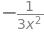

In [38]:
x = sym.symbols('x')
func= x**2/(3*x**3)
fprime = sym.diff(func)

fprime

## 2 Numerical Differentiation

In cases where the analytical derivative is too demanding to evaluate, we fall back on numeric methods to estimate the derivative for certain positions on a function curve. There are several methods available, but all estimate the slope between two points of a function $f(x)$. For these numerical methods we do not need SymPy anymore, as we want to work with numeric data not symbols.

### 2.1 Forward Difference

The derivative of a function is the slope of the tangent to $f(x)$ at a certain value of $x$. This can be estimated by measuring the slope between two adjacent points on $f(x)$. The slope is defined by the ratio of the change in $f(x)$ (i.e. vertical, y dimension) that occurs over some change in $x$ (the x dimension). The smaller the step between x values, the more accurate the estimate of the derivative is likely to be. The aim of numeric diferentiation is to estimate the slope of the function as the distance between successive x values tends towards zero.

If we define the step size (distance between x values) as $\Delta x$, we can measure the slope between two x values using:

$f'(x) \approx (f(x+\Delta x)-f(x)) / \Delta x$

This is the formula for forward differencing. It shows that the derivative can be estimated as f(x) at the greater x value minus f(x) at the lesser x value divided by the step size. We can code this up in Python for more clarity:


In [39]:
def fwd_diff(x1,step,func):
    
    """
    x1 = x-value where we want to estimate the derivative
    step = step size, delta x
    func = lambda function describing the function to differentiate
    
    """
    y1 = func(x1) #evaluate the function at x
    y2 = func(x1+step) #evaluate the function at x+delta_x
    fprime = (y2-y1) / step # calculate the derivative 
    
    return fprime



Having defined our function, we can use it to show that the accuracy of the estimate is crude when the step size is large, and successively more accurate as the step size decreases. For this simple function we can easily generate the analytical function so we can evaluate a precise answer to compare our estimate against:

In [40]:
# Analytical solution

x = sym.symbols('x')
func= x**2
fprime = sym.diff(func)

fprime

We will evaluate the derivative at x = 3. Given the analytical solution $2x$ we know the precise derivative of our function at x = 3 is 6. Let's see how well our forward difference function estimates this derivative:

In [41]:
import numpy as np

x1 = 3 # the x value where we want to estimate the derivative

step = [2.0, 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1,
        1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,
        0.01, 0.001, 0.0001, 0.00001, 0.000001] # define a range of step sizes from 2 to 0.000001

func = lambda x:x**2  # define our function

# set up empty list to append results to for plotting later
steps = [] 
fprimes = []
errors = []

# loop through the step sizes and make a derivative estimate using forward differencing with each
for step in step:
    
    fprime = fwd_diff(x1,step,func)
    
    steps.append(step)
    fprimes.append(fprime)
    errors.append(fprime-6)
    
    print("STEP = ", step, "    fprime = ", np.round(fprime,7), "    Error = ", np.round(fprime-6,7))

STEP =  2.0     fprime =  8.0     Error =  2.0
STEP =  1.9     fprime =  7.9     Error =  1.9
STEP =  1.8     fprime =  7.8     Error =  1.8
STEP =  1.7     fprime =  7.7     Error =  1.7
STEP =  1.6     fprime =  7.6     Error =  1.6
STEP =  1.5     fprime =  7.5     Error =  1.5
STEP =  1.4     fprime =  7.4     Error =  1.4
STEP =  1.3     fprime =  7.3     Error =  1.3
STEP =  1.2     fprime =  7.2     Error =  1.2
STEP =  1.1     fprime =  7.1     Error =  1.1
STEP =  1.0     fprime =  7.0     Error =  1.0
STEP =  0.9     fprime =  6.9     Error =  0.9
STEP =  0.8     fprime =  6.8     Error =  0.8
STEP =  0.7     fprime =  6.7     Error =  0.7
STEP =  0.6     fprime =  6.6     Error =  0.6
STEP =  0.5     fprime =  6.5     Error =  0.5
STEP =  0.4     fprime =  6.4     Error =  0.4
STEP =  0.3     fprime =  6.3     Error =  0.3
STEP =  0.2     fprime =  6.2     Error =  0.2
STEP =  0.1     fprime =  6.1     Error =  0.1
STEP =  0.01     fprime =  6.01     Error =  0.01
STEP =  0.

This shows that as the step size decreases, our estimate of the derivative gets better and better. We can plot this to make it easier to understand:

Text(0.5, 0, 'STEP SIZE')

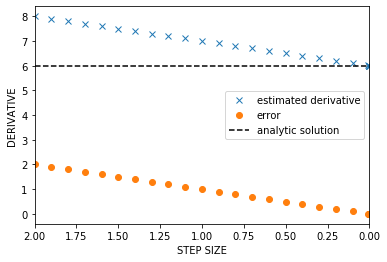

In [42]:
import matplotlib.pyplot as plt

plt.xlim(2,0)
plt.plot(steps,fprimes,label='estimated derivative',linestyle='None',marker='x')
plt.plot(steps,errors,label="error",linestyle='None',marker='o')
plt.plot(steps,np.ones(len(steps))*6,label="analytic solution",color='k',linestyle='--')
plt.legend(loc='best')
plt.ylabel("DERIVATIVE")
plt.xlabel("STEP SIZE")


We can see in the above plot that as the step size decreases (note the reversed x axis), the estimated derivative gets successively closer to the analytical solution and the error decreases.

### 2.2 Backwards Difference

In the examples above we estimated the derivative at x = 3 using the forward differece method, wherein we calculated the difference in $f(x)$ at $x$ and $x + \Delta x$, and divided this by step to get the local slope. This is forward differencing because $x + \Delta x$ is slightly greater (i.e. further R on the x-axis) than $x$, i.e. looking 'forward' from x to evaluate the slope.

However, it is equally valid to look 'backwards' from $x$ to estimate the slope. This is achieved by calculating the slope between $x$ and $x - \Delta x$. This is the "backwards difference" method.

Let's repeat the steps taken above but this time replacing forward difference with backwards difference...


In [43]:
def bwd_diff(x1,step,func):
    
    """
    x1 = x-value where we want to estimate the derivative
    step = step size, delta x
    func = lambda function describing the function to differentiate
    
    """
    y1 = func(x1) #evaluate the function at x
    y2 = func(x1-step) #evaluate the function at x-delta_x
    fprime = (y1-y2) / step # calculate the derivative 
    
    return fprime


x1 = 3 # the x value where we want to estimate the derivative

step = [2.0, 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1,
        1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,
        0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001] # define a range of step sizes from 2 to 0.000001

func = lambda x:x**2  # define our function

# set up empty list to append results to for plotting later
steps = [] 
fprimes = []
errors = []

# loop through the step sizes and make a derivative estimate using forward differencing with each
for step in step:
    
    fprime = bwd_diff(x1,step,func)
    
    steps.append(step)
    fprimes.append(fprime)
    errors.append(6-fprime)
    
    print("STEP = ", step, "    fprime = ", np.round(fprime,7), "    Error = ", np.round(fprime-6,7))

STEP =  2.0     fprime =  4.0     Error =  -2.0
STEP =  1.9     fprime =  4.1     Error =  -1.9
STEP =  1.8     fprime =  4.2     Error =  -1.8
STEP =  1.7     fprime =  4.3     Error =  -1.7
STEP =  1.6     fprime =  4.4     Error =  -1.6
STEP =  1.5     fprime =  4.5     Error =  -1.5
STEP =  1.4     fprime =  4.6     Error =  -1.4
STEP =  1.3     fprime =  4.7     Error =  -1.3
STEP =  1.2     fprime =  4.8     Error =  -1.2
STEP =  1.1     fprime =  4.9     Error =  -1.1
STEP =  1.0     fprime =  5.0     Error =  -1.0
STEP =  0.9     fprime =  5.1     Error =  -0.9
STEP =  0.8     fprime =  5.2     Error =  -0.8
STEP =  0.7     fprime =  5.3     Error =  -0.7
STEP =  0.6     fprime =  5.4     Error =  -0.6
STEP =  0.5     fprime =  5.5     Error =  -0.5
STEP =  0.4     fprime =  5.6     Error =  -0.4
STEP =  0.3     fprime =  5.7     Error =  -0.3
STEP =  0.2     fprime =  5.8     Error =  -0.2
STEP =  0.1     fprime =  5.9     Error =  -0.1
STEP =  0.01     fprime =  5.99     Erro

Text(0.5, 0, 'STEP SIZE')

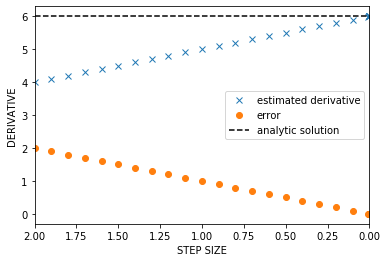

In [44]:
import matplotlib.pyplot as plt

plt.xlim(2,0)
plt.plot(steps,fprimes,label='estimated derivative',linestyle='None',marker='x')
plt.plot(steps,errors,label="error",linestyle='None',marker='o')
plt.plot(steps,np.ones(len(steps))*6,label="analytic solution",color='k',linestyle='--')
plt.legend(loc='best')
plt.ylabel("DERIVATIVE")
plt.xlabel("STEP SIZE")


### 2.3 Central Difference

The central difference is the mean of the forward and backward difference methods and gives a generally more accurate estimate of the derivative. The reason for this is because it is more symmetric. Whereas forward differences use values on the right hand side of the target x value to generate an estimate, and backwards differncing using vaues on the left hand side, central differencing linearly interpolates from LHS to RHS effectively averaging out the errors. Let's try it in Python:

In [45]:
def ctl_diff(x,step,func):
    
    """
    x1 = x-value where we want to estimate the derivative
    step = step size, delta x
    func = lambda function describing the function to differentiate
    
    """
    
    y1 = func(x-step) #evaluate the function at x-delta_x
    y2 = func(x) #evaluate the function at x
    y3 = func(x+step) #evaluate the function at x+delta_x
    
    fprime = (y3-y1)/(2*step) # calculate the derivative 
    
    return fprime


x1 = 3 # the x value where we want to estimate the derivative

step = [2.0, 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1,
        1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,
        0.01, 0.001, 0.0001, 0.00001, 0.000001,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15] # define a range of step sizes from 2 to 0.000001

func = lambda x:x**3  # define our function

# set up empty list to append results to for plotting later
steps = [] 
fprimes = []
errors = []

# loop through the step sizes and make a derivative estimate using forward differencing with each
for step in step:
    
    fprime = ctl_diff(x1,step,func)
    
    steps.append(step)
    fprimes.append(fprime)
    errors.append(abs(fprime-27))
    
    print("STEP = ", step, "    fprime = ", np.round(fprime,7), "    Error = ", np.round(fprime-27,7))

STEP =  2.0     fprime =  31.0     Error =  4.0
STEP =  1.9     fprime =  30.61     Error =  3.61
STEP =  1.8     fprime =  30.24     Error =  3.24
STEP =  1.7     fprime =  29.89     Error =  2.89
STEP =  1.6     fprime =  29.56     Error =  2.56
STEP =  1.5     fprime =  29.25     Error =  2.25
STEP =  1.4     fprime =  28.96     Error =  1.96
STEP =  1.3     fprime =  28.69     Error =  1.69
STEP =  1.2     fprime =  28.44     Error =  1.44
STEP =  1.1     fprime =  28.21     Error =  1.21
STEP =  1.0     fprime =  28.0     Error =  1.0
STEP =  0.9     fprime =  27.81     Error =  0.81
STEP =  0.8     fprime =  27.64     Error =  0.64
STEP =  0.7     fprime =  27.49     Error =  0.49
STEP =  0.6     fprime =  27.36     Error =  0.36
STEP =  0.5     fprime =  27.25     Error =  0.25
STEP =  0.4     fprime =  27.16     Error =  0.16
STEP =  0.3     fprime =  27.09     Error =  0.09
STEP =  0.2     fprime =  27.04     Error =  0.04
STEP =  0.1     fprime =  27.01     Error =  0.01
STEP

Text(0.5, 0, 'STEP SIZE')

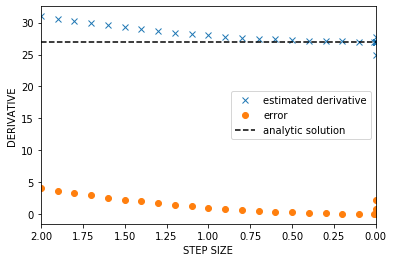

In [46]:
import matplotlib.pyplot as plt

plt.xlim(2,0)
plt.plot(steps,fprimes,label='estimated derivative',linestyle='None',marker='x')
plt.plot(steps,errors,label="error",linestyle='None',marker='o')
plt.plot(steps,np.ones(len(steps))*27,label="analytic solution",color='k',linestyle='--')
plt.legend(loc='best')
plt.ylabel("DERIVATIVE")
plt.xlabel("STEP SIZE")

## 3 Error Analysis


### Truncation error

error created by truncating a mathematical procedure i.e. finishing a series at a finite point, omitting higher order terms in Taylor series expansion. Error caused by approximating a function, not rounding numbers. When we use numerical methods to estimate the derivative at $x$ we are not truly taking the limit, we are replacing the limit $x \rightarrow 0$ with a finite step $\Delta x$, which is why numerical methods are approximations rather than precise solutions. The error caused by using a finite step size rather than the limit $x \rightarrow 0$ is called the "truncation error" or "discretization error". This error diminishes as the step size shrinks. In the plots above we are observing the truncation error shrinking as the step size decreases, because the approximation to the limit $x\rightarrow 0$ is becoming more accurate.

### Rounding error

The rounding error is due to the precision of the computer being used to calculate derivatives. Floating point numbers have a finite precision due to the fixed number of bytes of memory used to store the values - the precision depends upon the magnitude of the value. For a process that approximates an infinitessimal limit, the available precision of floating point numbers may become significant.

A simple example is the result of the sum $1/3$. The true answer is 0.33333 recurring, with an infinite number of 3's following the decimal point. However, in a computer with, say 6 available digits this number can only be represented as 0.3333 since two digits were used for the leading zero and decimal point. The error in that case is 0.00003333... with an infinite tail of 3s. Other simple examples are floating point representation of $\pi$, or $\sqrt(2)$ or any other irrational number.

Numerical methods for estimating derivatives approximate the limit $x \rightarrow 0$ with a finite step size $\Delta x$. The smaller $\Delta x$ the better the aproximation, meaning the truncation error decreases. However, the smaller the value of $\Delta x$ the more likely it is to exceed the precision limit of the floating point data type being used. 

However, extremely small step sizes can simply be lost in the precision of the floating point structure used to represent them in a computer. For example, if $x = 1$ and $\Delta x = 1e-17$ then the computer sees $x + \Delta x$ 
as equal to 1 - i.e. $\Delta x$ has been lost.

In [47]:
x = 1
del_x = 1e-17
A = x + del_x

print(A)

1.0


This "rounding off" error can lead to noisy estimates of the derivatives, often causing a derivative to be grossly overestimated or estimated to be equal to 0. As the step size decreases beyond the precision of the computer, this error increases. 

We can observe this effect in action by repeating our central difference calculation but with an extended range of step sizes, down to 1e-17. The error in the estimated derivative decreases to a threshold, then begin to climb. The threshold is the optimal point where truncation errors and rounding errors balance.


In [48]:
x1 = 3 # the x value where we want to estimate the derivative

step = [0.01, 0.001, 0.0001, 0.00001, 0.000001,1e-8,1e-9,
        1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17,1e-18,1e-19,1e-20] # define a range of step sizes from 2 to 0.000001

func = lambda x:x**3  # define our function

# set up empty list to append results to for plotting later
steps = [] 
fprimes = []
errors = []

# loop through the step sizes and make a derivative estimate using forward differencing with each
for step in step:
    
    fprime = ctl_diff(x1,step,func)
    
    steps.append(step)
    fprimes.append(fprime)
    errors.append(abs(fprime-27))
    
    print("STEP = ", step, "    fprime = ", np.round(fprime,7), "    Error = ", np.round(fprime-27,7))

STEP =  0.01     fprime =  27.0001     Error =  0.0001
STEP =  0.001     fprime =  27.000001     Error =  1e-06
STEP =  0.0001     fprime =  27.0     Error =  0.0
STEP =  1e-05     fprime =  27.0     Error =  0.0
STEP =  1e-06     fprime =  27.0     Error =  0.0
STEP =  1e-08     fprime =  26.9999999     Error =  -1e-07
STEP =  1e-09     fprime =  27.0000022     Error =  2.2e-06
STEP =  1e-10     fprime =  27.00002     Error =  2e-05
STEP =  1e-11     fprime =  26.9999134     Error =  -8.66e-05
STEP =  1e-12     fprime =  27.0024003     Error =  0.0024003
STEP =  1e-13     fprime =  26.9650968     Error =  -0.0349032
STEP =  1e-14     fprime =  27.7111667     Error =  0.7111667
STEP =  1e-15     fprime =  24.8689958     Error =  -2.1310042
STEP =  1e-16     fprime =  0.0     Error =  -27.0
STEP =  1e-17     fprime =  0.0     Error =  -27.0
STEP =  1e-18     fprime =  0.0     Error =  -27.0
STEP =  1e-19     fprime =  0.0     Error =  -27.0
STEP =  1e-20     fprime =  0.0     Error =  -

Text(0.5, 0, 'STEP SIZE')

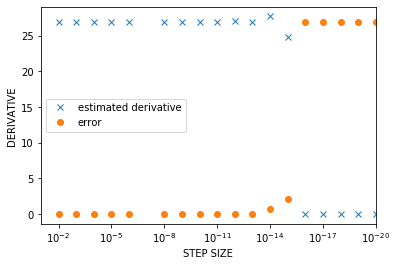

In [49]:
import matplotlib.pyplot as plt
plt.xscale('log')
plt.xlim(1e-1,1e-20)
plt.plot(steps,fprimes,label='estimated derivative',linestyle='None',marker='x')
plt.plot(steps,errors,label="error",linestyle='None',marker='o')
plt.legend(loc='best')
plt.ylabel("DERIVATIVE")
plt.xlabel("STEP SIZE")

The plot above shows estimates of the derivative of $f(x) = x^3$ at $x = 3$ close to the exact answer of $dx/dy = 27$ until the step size is less than $10^{-14}$, after which point the error climbs rapidly and the estimated derivative tends towards $dx/dy = 0$ due to round-off error.

## Summary

In this notebook we have looked at differentiating functions. We started with the analytical solution which we obtained with symbolic operations using the Python package SymPy. The analytic solution gived a precise answer for the derivative of the function $f(x)$ at any value of x. There are a well-known set of rules for finding the analytical derivative including the product rule, power rule, chain rule and quotient rule which we outlined here and verified using SymPy.

However, often the function $f(x)$ is too complex to differentiate analytically. In these cases, we fall back to numerical methods which allow us to estimate the local derivative by calculating the slope between two values of the function, with successively smaller gaps between the two values giving increasingly accurate estimates because the truncation error - the error caused by approxmating the derivative over some finite step - diminishes. However, when we use a computer to apply numerical methods to estimating derivatives, the precision of numbers stored in memory produces another type of error - the rounding error, which increases as the step size decreases. The optimum step size is therefore found where the rounding errors and truncation errors balance.
